In [1]:
from darkflow.net.build import TFNet
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
config = tf.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth=True
with tf.Session(config=config) as sess:
    options = {
        'model':os.path.join('custom_darkflow','cfg','yolov2.cfg'),
        'load':os.path.join('custom_darkflow','bin','yolov2.weights'),
        'threshold':0.3,
        'gpu':1.0
    }
    tfnet = TFNet(options)

C:\Users\sungsooc\AppData\Local\Continuum\anaconda3\envs\cv-gpu\lib\site-packages\darkflow\dark\darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use custom_darkflow\cfg\yolov2.cfg instead
  cfg_path, FLAGS.model))


Parsing custom_darkflow\cfg\yolov2.cfg
Loading custom_darkflow\bin\yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.01595449447631836s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      

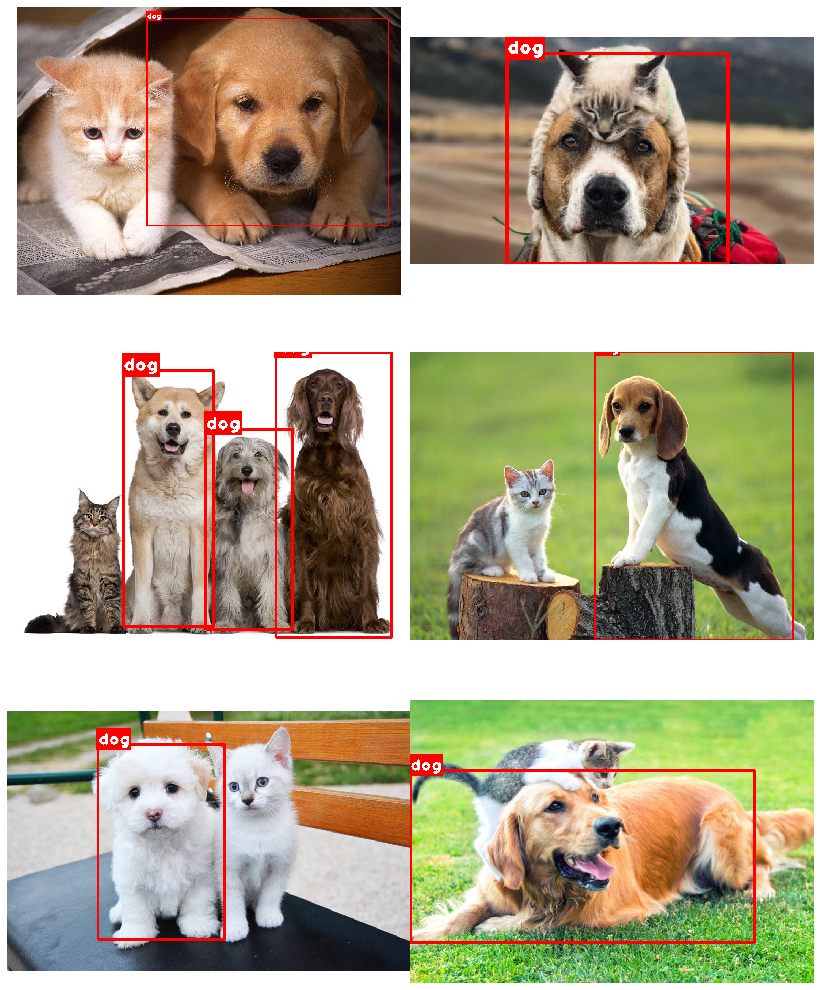

In [3]:
box_color = (255,0,0)
txt_color = (255,255,255)
fig, axes = plt.subplots(3, 2,figsize=(8*2, 6*3))
for ax,img_num in zip(axes.flatten(),range(1,7)):
    img = cv2.imread(os.path.join('custom_darkflow','test_images',str(img_num)+'.jpg'))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    result = tfnet.return_predict(img)
    for r in result:
        tl = (r['topleft']['x'], r['topleft']['y'])
        br = (r['bottomright']['x'], r['bottomright']['y'])
        label = r['label']
        if label == 'dog':     
#             conf = r['confidence']
#             text = '{}({:.2f})'.format(label,conf)
            text = '{}'.format(label)
            (text_width, text_height) = cv2.getTextSize(text, cv2.FONT_HERSHEY_PLAIN,2,5)[0]
            text_offset_x = tl[0]-3
            text_offset_y = tl[1]
            box_coords = ((text_offset_x, text_offset_y+10), (text_offset_x+text_width,text_offset_y-text_height-10))
            img = cv2.rectangle(img, box_coords[0], box_coords[1], box_color, cv2.FILLED)
            img = cv2.rectangle(img,tl,br,box_color,thickness=4)
            img = cv2.putText(img,text,tl,cv2.FONT_HERSHEY_PLAIN,2,txt_color,3)
    ax.imshow(img)
    ax.axis('off')
plt.subplots_adjust(left=0.2, wspace=0)